# Natural Language Processing with Disaster Tweets

https://www.kaggle.com/c/nlp-getting-started/data

In [1]:
import os
import pandas as pd


data_fp = os.path.join(os.getcwd(), "data")
train_fp = os.path.join(data_fp, "train.csv")
train = pd.read_csv(train_fp, encoding="utf-8")
test_fp = os.path.join(data_fp, "test.csv")
test = pd.read_csv(test_fp, encoding="utf-8")

print(f"Train: {train.shape}")
print(f"Test:  {test.shape}")

train.head()

Train: (7613, 5)
Test:  (3263, 4)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Bernoulli distribution, p = 0.43
Mean accuracy on 5-fold cross validation: 0.74


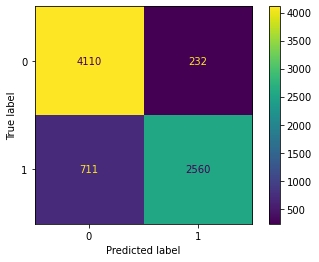

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB


cv = CountVectorizer()
cv.fit(train["text"])
train_arr = cv.transform(train["text"])
train_labels = train["target"]
print(f"Bernoulli distribution, p = {train_labels.mean():.2f}")
model = BernoulliNB()
cv = cross_validate(model, train_arr, train_labels, cv=5, return_estimator=True)
mean_score = cv["test_score"].mean()
print(f"Mean accuracy on 5-fold cross validation: {mean_score:.2f}")
best_estimator = cv["estimator"][cv["test_score"].argmax()]
pred = best_estimator.predict(train_arr)
cm = plot_confusion_matrix(best_estimator, train_arr, train_labels)